# Building the network
With MNIST, each image is 28*28 = 784 pixels and 10 classes

In [3]:
import torch
from torchvision import datasets, transforms
import helper
import numpy as np
import time
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict

# Define transform normalization
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

# Download dataset
trainset = datasets.FashionMNIST("F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Hyperparams to the network
input_size = 784
hidden_sizes = [128, 64, 32]
output_size = 10

# Feed forward
model = nn.Sequential()

model = nn.Sequential(OrderedDict([
                     ("fc1", nn.Linear(input_size, hidden_sizes[0])),
                     ("relu1", nn.ReLU()),
                     ("fc2", nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                     ("relu2", nn.ReLU()),
                     ("fc3", nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                     ("relu3", nn.ReLU()),
                     ("logits", nn.Linear(hidden_sizes[2], output_size))]))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 3
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1
        images.resize_(images.shape[0], 784)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{} -- Loss: {:.4f}" .format(epoch, epochs, running_loss/print_every))
            running_loss = 0

Epoch: 0/3 -- Loss: 2.2928
Epoch: 0/3 -- Loss: 2.2739
Epoch: 0/3 -- Loss: 2.2456
Epoch: 0/3 -- Loss: 2.2019
Epoch: 0/3 -- Loss: 2.1296
Epoch: 0/3 -- Loss: 2.0371
Epoch: 0/3 -- Loss: 1.9004
Epoch: 0/3 -- Loss: 1.7592
Epoch: 0/3 -- Loss: 1.5573
Epoch: 0/3 -- Loss: 1.4173
Epoch: 0/3 -- Loss: 1.2650
Epoch: 0/3 -- Loss: 1.1588
Epoch: 0/3 -- Loss: 1.0959
Epoch: 0/3 -- Loss: 0.9984
Epoch: 0/3 -- Loss: 0.9945
Epoch: 0/3 -- Loss: 0.9458
Epoch: 0/3 -- Loss: 0.9116
Epoch: 0/3 -- Loss: 0.8760
Epoch: 0/3 -- Loss: 0.8391
Epoch: 0/3 -- Loss: 0.8222
Epoch: 0/3 -- Loss: 0.8007
Epoch: 0/3 -- Loss: 0.8073
Epoch: 0/3 -- Loss: 0.7569
Epoch: 1/3 -- Loss: 0.4542
Epoch: 1/3 -- Loss: 0.7430
Epoch: 1/3 -- Loss: 0.7671
Epoch: 1/3 -- Loss: 0.7176
Epoch: 1/3 -- Loss: 0.7393
Epoch: 1/3 -- Loss: 0.6862
Epoch: 1/3 -- Loss: 0.7035
Epoch: 1/3 -- Loss: 0.6986
Epoch: 1/3 -- Loss: 0.6692
Epoch: 1/3 -- Loss: 0.6738
Epoch: 1/3 -- Loss: 0.6528
Epoch: 1/3 -- Loss: 0.6716
Epoch: 1/3 -- Loss: 0.6786
Epoch: 1/3 -- Loss: 0.6612
E

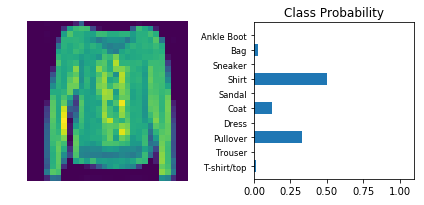

In [14]:
from random import randint
images, labels = next(iter(trainloader))
index = randint(1, images.shape[0])
img = images[index].view(1, 784)

# Turn off gradients to speed up
with torch.no_grad():
    logits = model.forward(img)

# Output the classification
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps, version="Fashion")
